In [1]:
import numpy as np

## Pandas data structures

https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html

https://www.w3resource.com/python-exercises/pandas/index.php

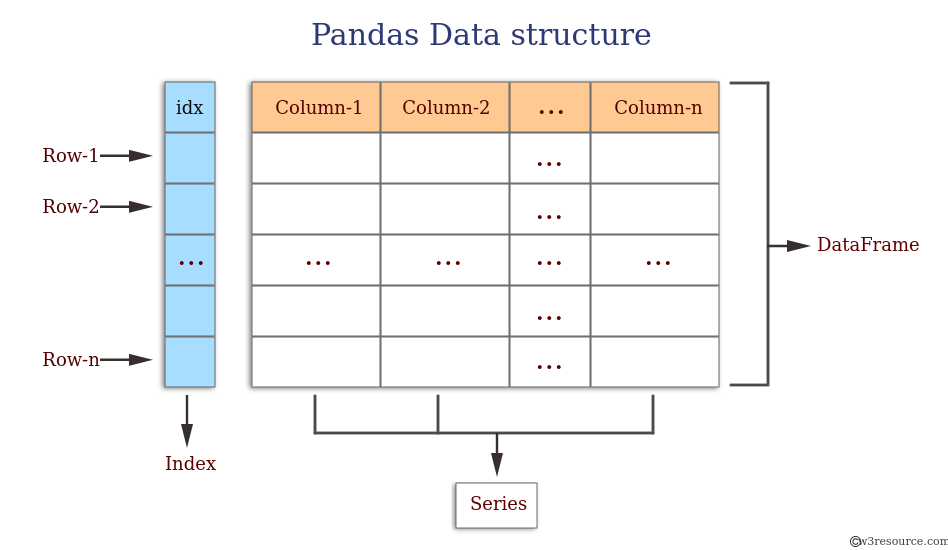

In [2]:
import pandas as pd

### Series

In [3]:
s = pd.Series([2, 4, 6, 10, 100], dtype=float)
type(s)

pandas.core.series.Series

In [4]:
s = pd.Series(np.random.randn(5), index=['a', 1, 'c', 10., 'e'])
s.values

array([-0.71042277, -1.75566724, -1.37181581, -0.3544266 , -1.94130011])

In [5]:
# series from dict
d = {'b': 1, 'a': 0, 'c': 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [6]:
d = {'a': 0., 'b': 1., 'c': 2.}
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [7]:
# series scalar
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [8]:
# Series as 1dim ndarray-like
print(s['a'])
print(s[:3:2])
s

-0.7104227695694026
a   -0.710423
c   -1.371816
dtype: float64


a      -0.710423
1      -1.755667
c      -1.371816
10.0   -0.354427
e      -1.941300
dtype: float64

In [9]:
# Series as typed dicts
print(s['a'])
# print(s['e'] = 12.)
print('e' in s)

s

-0.7104227695694026
True


a      -0.710423
1      -1.755667
c      -1.371816
10.0   -0.354427
e      -1.941300
dtype: float64

In [10]:
idx = s.keys().tolist()
# print(s.values)

idx_str = [el for el in idx if isinstance(el, str)]
s[idx_str]

a   -0.710423
c   -1.371816
e   -1.941300
dtype: float64

### DataFrames

May be constracted from:

- Dict of 1D ndarrays, lists, dicts, or Series

- 2-D numpy.ndarray

- Structured or record ndarray

- A Series

- Another DataFrame

In [11]:
# From lists as rows
l1 = ['Hello', ',', 'my', 'friends']
l2 = ['What', 'a', 'lovely', 'day']
pd.DataFrame((l1, l2))

,0,1,2,3
0,Hello,",",my,friends
1,What,a,lovely,day


In [12]:
# From lists as columns
pd.DataFrame(list(zip(l1, l2)), columns = ['C1', 'C2'])

,C1,C2
0,Hello,What
1,",",a
2,my,lovely
3,friends,day


In [13]:
# From ndarray
pd.DataFrame([np.random.randn(5), np.random.randn(5)])

,0,1,2,3,4
0,-0.586426,0.969333,-0.09559,0.700726,-0.828458
1,1.486875,-1.123404,0.48221,0.412275,-0.661498


In [14]:
# from dictionary of Series
d = {'one': pd.Series([1., 2., 3., 5.], index=['a', 'b', 'c', 't']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0
t,5.0,NaN


In [15]:
# from dictionary of lists
details = { 
    'Name' : ['Ankit', 'Aishwarya', 'Shaurya', 'Shivangi'], 
    'Age' : [23, 21, 22, 21], 
    'University' : ['BHU', 'JNU', 'DU', 'BHU'], 
} 
students = pd.DataFrame(details, index=['a', 'b', 'c', 'd'])  
students

,Name,Age,University
a,Ankit,23,BHU
b,Aishwarya,21,JNU
c,Shaurya,22,DU
d,Shivangi,21,BHU


### Index structure

In [16]:
# Immutable tupels
ls = (3, 4, 5, 6, 7, 8)
ls[0] = 10

TypeError: 'tuple' object does not support item assignment

In [ ]:
# Index is immutable structure
print(students.index)
students.index['a'] = 'Ann'

## Data understanding 

Data from https://cneos.jpl.nasa.gov/fireballs/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [17]:
# Read data from a csv file
df = pd.read_csv('cneos_fireball_data.csv')
df1 = pd.read_csv('cneos_fireball_data.csv', index_col='Peak Brightness Date/Time (UT)')

In [18]:
# first 5 rows
df1.head(3)

,Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
Peak Brightness Date/Time (UT),,,,,,,,,
2020-11-07 21:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,1.110000e+11,0.33
2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,1.140000e+11,0.34
2020-10-23 20:51:39,30.0N,71.9W,48.0,NaN,NaN,NaN,NaN,8.000000e+10,0.25


In [19]:
# last 10 rows
df.tail()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
842,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
843,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
844,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
845,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200
846,1988-04-15 03:03:10,4.1S,124.3E,NaN,NaN,NaN,NaN,NaN,7.580000e+12,14.000


In [20]:
# Shapes and number of recodrs
df.shape

(847, 10)

In [21]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peak Brightness Date/Time (UT)       847 non-null    object 
 1   Latitude (deg.)                      662 non-null    object 
 2   Longitude (deg.)                     662 non-null    object 
 3   Altitude (km)                        409 non-null    float64
 4   Velocity (km/s)                      233 non-null    float64
 5   vx                                   233 non-null    float64
 6   vy                                   233 non-null    float64
 7   vz                                   233 non-null    float64
 8   Total Radiated Energy (J)            847 non-null    float64
 9   Calculated Total Impact Energy (kt)  847 non-null    float64
dtypes: float64(7), object(3)
memory usage: 66.3+ KB


In [22]:
# statistics for each column
df.describe()

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
count,409.000000,233.000000,233.000000,233.000000,233.000000,8.470000e+02,847.000000
mean,36.034719,17.818455,-0.044206,-2.333906,-0.611159,9.274628e+11,1.447511
std,10.294843,5.897183,10.991042,10.995203,10.366448,1.369405e+13,16.397981
min,14.500000,9.800000,-35.400000,-43.500000,-31.200000,2.000000e+10,0.073000
25%,29.400000,13.800000,-8.500000,-10.700000,-8.500000,3.200000e+10,0.110000
50%,34.300000,16.700000,0.100000,-3.000000,0.600000,6.500000e+10,0.210000
75%,40.700000,19.800000,8.500000,4.600000,7.000000,1.500000e+11,0.430000
max,74.000000,49.000000,27.800000,31.200000,27.000000,3.750000e+14,440.000000


In [ ]:
# count unique values in each columns 
df.nunique()

In [23]:
# getting list of values from a column
df['Longitude (deg.)'].values

array(['16.8E', '160.4E', '71.9W', '133.5W', '150.2W', '93.9W', '93.9E',
       '135.8W', '169.7W', '133.5E', '34.2W', '103.8W', '11.2W', '74.0E',
       '41.7E', '77.2E', '174.2E', '44.2W', '131.0W', '109.4W', '49.8W',
       '45.6W', '23.5E', '67.9W', nan, '90.8E', '15.1E', '96.0W', '76.7E',
       '1.5E', '35.8W', '34.3E', '66.0W', '116.4W', '125.2W', '17.5W',
       '147.6W', '161.7E', '37.7W', '52.2W', '31.7W', nan, '25.7E',
       '143.3W', '76.0W', '122.9E', '107.2W', '28.4W', '33.5W', '126.9E',
       '9.2E', '47.8W', '130.4W', '92.9W', '7.0E', '147.6W', '129.5W',
       '168.7E', '66.2W', '67.6W', '25.3W', '89.4E', '37.3W', '137.5E',
       '132.8E', '57.1W', '88.3W', '67.8E', '74.6W', '94.9E', '93.9W',
       '7.4W', '140.3E', '95.7E', '25.3E', '83.8W', nan, '6.5E', '174.4W',
       '172.4E', '6.7W', '172.9W', '57W', '83.5E', '148.6W', nan, '31.7W',
       '56.8E', '44.9E', '75.1E', '27.8W', '50.1W', '141.4E', '162.9W',
       '105.8E', '69.0W', '136.7W', '12.1E', '38.1E', '2

## Getting data with loc and iloc

In [ ]:
df1.head()

In [ ]:
# Loc - location, explicit index by name
df.loc[10]

In [ ]:
df1.loc['2020-10-23 20:51:39']

In [ ]:
# iloc - integer location, implicit index by count
df.iloc[0]

In [ ]:
df1.iloc[0]

In [ ]:
# Must be the same
print(df.loc[0], '\n')
print(df.iloc[0])

In [ ]:
# Must be the same
print(df1.loc['2020-10-26 15:09:10'], '\n')
print(df1.iloc[1])

### Getting columns with loc and iloc

sintaxis is similar to ndarrays slicing

In [ ]:
# getting columns from list of names
cols = ['vx','vy','vz']
df[cols]

In [ ]:
# using loc
df.loc[:,'vx':'vz']

In [ ]:
# uising iloc
df.iloc[:,5:8]
# df

### Mapping

In [26]:
df[df['Velocity (km/s)']<100]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2020-11-07 21:27:04,59.8N,16.8E,22.3,16.7,-10.8,1.2,-12.7,1.110000e+11,0.33
1,2020-10-26 15:09:10,5.9S,160.4E,28.5,17.6,10.9,-13.8,-0.1,1.140000e+11,0.34
3,2020-10-22 17:39:33,22.0N,133.5W,40.0,17.6,-9.4,14.1,-4.9,4.400000e+10,0.15
7,2020-10-18 10:52:43,11.4S,135.8W,36.0,16.4,15.6,1.5,4.9,3.600000e+10,0.12
8,2020-09-18 08:05:27,2.4N,169.7W,46.0,11.7,10.2,2.9,-4.9,4.100000e+10,0.14
...,...,...,...,...,...,...,...,...,...,...
578,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.240000e+11,1.50
579,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.330000e+11,1.10
590,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.180000e+11,1.30
595,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.150000e+12,4.60
